<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning 
* Understanding Data Visualization

### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [36]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
## Read the csv file
filepath = 'Airbnb_Open_Data.csv'
df = pd.read_csv(filepath, low_memory=False)

In [38]:
## Display the first 5 rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [39]:
## Display the data types
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset. 
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [40]:
# Checking the country column:
print('Counties in the dataset:')
print(df['country'].value_counts())

# Checking the coutry id column:
print('\nCounty codes in the dataset:')
print(df['country code'].value_counts())


Counties in the dataset:
United States    102067
Name: country, dtype: int64

County codes in the dataset:
US    102468
Name: country code, dtype: int64


**Conclusions**: 
* The data was colected only in New York, US, hence there is no need to keep the "Country" and "Coutry code" columns;
* There is also no need for the "host id" and 'host name' columns, as they will be of no help for our analysis, and this way we keep the anonimity of the host intact
* We can also remove 'lat' and 'long' columns as we will not perform any geospatial analysis
* We also do not need the 'id' column as we will not use it in our analysis

In [41]:
# Checking the nr of cols before
print('Nr of columns before: {}'.format(df.shape[1]))

unwanted_cols = ['host id', 'host name','id','country', 'country code','lat','long']
df.drop(unwanted_cols, axis = 1, inplace=True)

# Checking nr of cols after
print('Nr of columns after: {}'.format(df.shape[1]))

Nr of columns before: 26
Nr of columns after: 19


## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [42]:
## Check for missing values in the dataframe and display the count in ascending order.
missing_vals = df.isna()
total_missing_vals = missing_vals.sum().sort_values()

# Computing the percentage of the null values
p = total_missing_vals / len(df)

null_data = pd.concat([total_missing_vals, p], axis=1)
null_data.columns = ['Nr of null vals', 'Percentage of null values']

# Adding column data type
null_data['Column Type'] = df[null_data.index].dtypes

display(null_data)

,Nr of null vals,Percentage of null values,Column Type
room type,0,0.000000,object
neighbourhood,16,0.000156,object
neighbourhood group,29,0.000283,object
cancellation_policy,76,0.000741,object
instant_bookable,105,0.001023,object
number of reviews,183,0.001784,float64
Construction year,214,0.002086,float64
price,247,0.002407,object
NAME,250,0.002437,object
service fee,273,0.002661,object


After the null values analysis, we can conclude that the 'license' and 'house_rules' columns can safely be removed as more than half of their values are null and they wouldn't be safe to impute.

In [43]:
df.drop(['license','house_rules'],axis = 1, inplace=True)
null_data.drop(['license','house_rules'], inplace=True)

In [44]:
# Get all the numerical and categorical columns which contain nulls
categorical_null_cols = null_data[null_data['Column Type'] == 'object'].index.to_list()
numerical_null_cols = [element for element in null_data.index.to_list() if element not in categorical_null_cols]

print('Numerical null containing columns: \n{}'.format(numerical_null_cols))
print('\nCategorical null containing columns: \n{}'.format(categorical_null_cols))

Numerical null containing columns: 
['number of reviews', 'Construction year', 'calculated host listings count', 'review rate number', 'minimum nights', 'availability 365', 'reviews per month']

Categorical null containing columns: 
['room type', 'neighbourhood', 'neighbourhood group', 'cancellation_policy', 'instant_bookable', 'price', 'NAME', 'service fee', 'host_identity_verified', 'last review']


In [46]:
# Imputing
# Numerical columns
for col in numerical_null_cols:
    df[col] = df[col].fillna(0)

# Categorical columns
# We will impute by adding a new 'unknown' option
for col in categorical_null_cols:
    df[col] = df[col].fillna('unknown')

# Check for nulls
print('Nr of null entries: {}'.format(df.isna().sum().sum()))

Nr of null entries: 0


In [47]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
print('Number of duplicate rows: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)
print('Duplicates dropped')

Number of duplicate rows: 3625
Duplicates dropped


In [48]:
## Display the total number of records in the dataframe after removing the duplicates.
df.shape[0]

98974

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [49]:
## Rename the column.
df.rename(columns={"availability 365": "days_booked"}, inplace=True)

In [50]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
print('New column names: \n{}'.format(df.columns.to_list()))

New column names: 
['name', 'host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'days_booked']


In [51]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '').str.replace('unknown', '0').astype(float)

df['service_fee'] = df['service_fee'].str.replace('$', '', regex=False).str.replace(',', '').str.replace('unknown', '0').astype(float)

In [52]:
display(df[['price','service_fee']].head())

,price,service_fee
0,966.0,193.0
1,142.0,28.0
2,620.0,124.0
3,368.0,74.0
4,204.0,41.0


### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [53]:
## List the count of various room types avaliable with Airbnb
df['room_type'].value_counts()

Entire home/apt    51916
Private room       44799
Shared room         2144
Hotel room           115
Name: room_type, dtype: int64

In [54]:
## Which room type adheres to more strict cancellation policy
# Get the percertages of room type for each of the cancellation_policy types
df_slice = df[['room_type','cancellation_policy']]
df_gb = df_slice.groupby('room_type').value_counts(normalize=True)*100
print('Cancellation policy distribution by room type [%]:\n{}'.format(df_gb))

# Make it easier to compare the percentages by taking the maximum of each cancellation_policy type
max_values_df_gb = df_gb.groupby(level='cancellation_policy').idxmax()
print('\nMaximum values for each room cancellation policy:\n{}'.format(max_values_df_gb.values))

Cancellation policy distribution by room type [%]:
room_type        cancellation_policy
Entire home/apt  flexible               33.398182
                 moderate               33.350027
                 strict                 33.155482
                 unknown                 0.096309
Hotel room       flexible               38.260870
                 moderate               32.173913
                 strict                 29.565217
Private room     moderate               33.643608
                 strict                 33.266368
                 flexible               33.038684
                 unknown                 0.051340
Shared room      strict                 33.442164
                 moderate               33.255597
                 flexible               33.162313
                 unknown                 0.139925
dtype: float64

Maximum values for each room cancellation policy:
[('Hotel room', 'flexible') ('Private room', 'moderate')
 ('Shared room', 'strict') ('Shared roo

**Conclusion**: The room type witch adheres to the most strict cancellation policy is the *shared room*. 

In [59]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
# First, lets see all the unique values for the neighbourhood_group
print(df['neighbourhood_group'].value_counts().index.to_list())

# There are some misspellings which should be fixed before moving forward with the analysis
df['neighbourhood_group'] = df['neighbourhood_group'].replace('manhatan', 'Manhattan')
df['neighbourhood_group'] = df['neighbourhood_group'].replace('brookln', 'Brooklyn')

# Checking to see if the problem was solved
print(df['neighbourhood_group'].value_counts().index.to_list())

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island', 'unknown', 'brookln', 'manhatan']
['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island', 'unknown']


In [60]:
# Prices by neighbourhood group
print('Prices by neighbourhood group:')
print(df.groupby('neighbourhood_group')['price'].value_counts().head())

# To find out which is the most expensive neighbourhood group, we can use the median as a good method of measuring the price 
print('\nMedian price by neighbourhood group:')
print(df.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False))

Prices by neighbourhood group:
neighbourhood_group  price
Bronx                531.0    11
                     100.0    10
                     827.0    10
                     164.0     9
                     450.0     9
Name: price, dtype: int64

Median price by neighbourhood group:
neighbourhood_group
unknown          651.0
Bronx            630.0
Staten Island    629.0
Brooklyn         625.0
Queens           625.0
Manhattan        620.0
Name: price, dtype: float64


**Conclusion**: The most expensive neighbourhood group, in general, is Bronx.

Note:
We can ignore *unknown* as it is only the paceholder we created for null entries, and it also contains only few data which might just be of high prices.

## Task 5a: Data Visualization (Any Tool)

- Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset.
    - Create another chart with the 10 cheapest neighborhoods in the dataset.
- Create a box and whisker chart that showcases the price distribution of all listings split by room type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

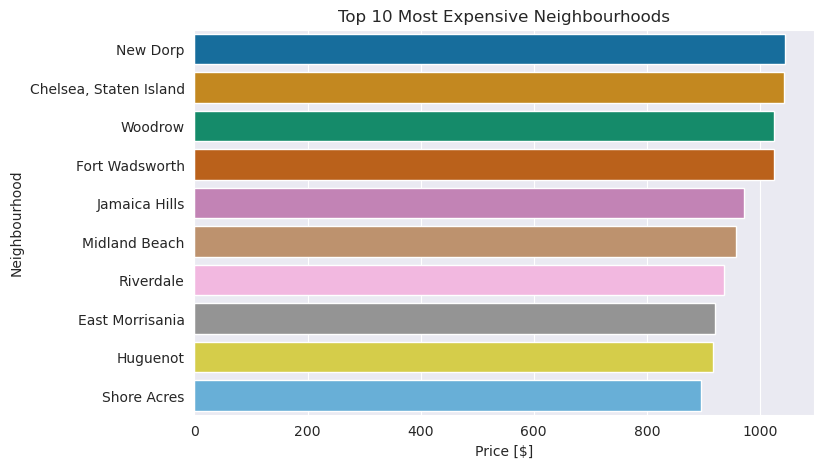

In [22]:
top_neighbourhoods = df.groupby('neighbourhood')['price'].median().nlargest(10).reset_index()

# Plotting
# Setting general seaborn visual parameters
sns.set_style('darkgrid')
sns.set_palette('colorblind')

# Barplot 1
plt.figure(figsize=(8,5))
sns.barplot(data = top_neighbourhoods, x='price', y='neighbourhood')
plt.title('Top 10 Most Expensive Neighbourhoods')
plt.xlabel('Price [$]')
plt.ylabel('Neighbourhood')
plt.show()

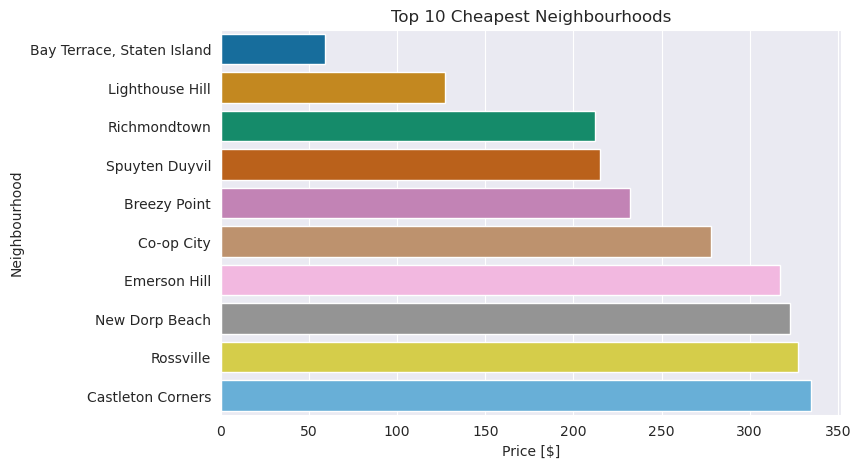

In [61]:
top_neighbourhoods = df.groupby('neighbourhood')['price'].median().nsmallest(10).reset_index()

# Barplot 2
plt.figure(figsize=(8,5))
sns.barplot(data = top_neighbourhoods, x='price', y='neighbourhood')
plt.title('Top 10 Cheapest Neighbourhoods')
plt.xlabel('Price [$]')
plt.ylabel('Neighbourhood')
plt.show()

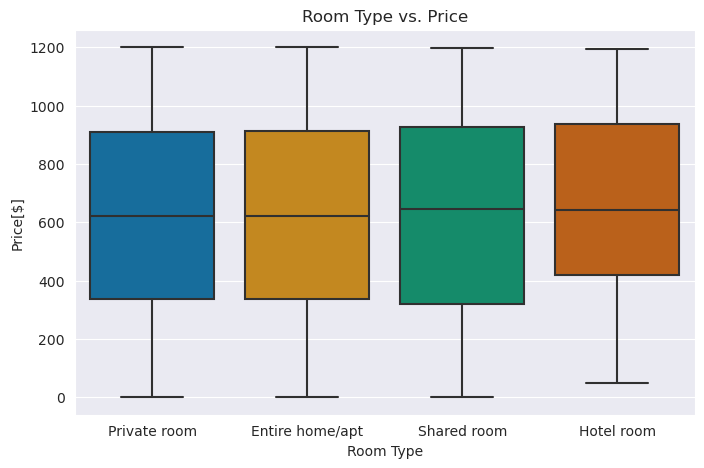

In [24]:
# Box plot 
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.xlabel("Room Type")
plt.ylabel("Price[$]")
plt.title("Room Type vs. Price")
plt.show()

## Task 5b: Data Visualization (Any Tool)

- Create a scatter plot to illustrate the relationship between the cleaning fee and the room price and write down the kind of correlation, if any, that you see.
- Create a line chart to showcase the total amount of listings available per year.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

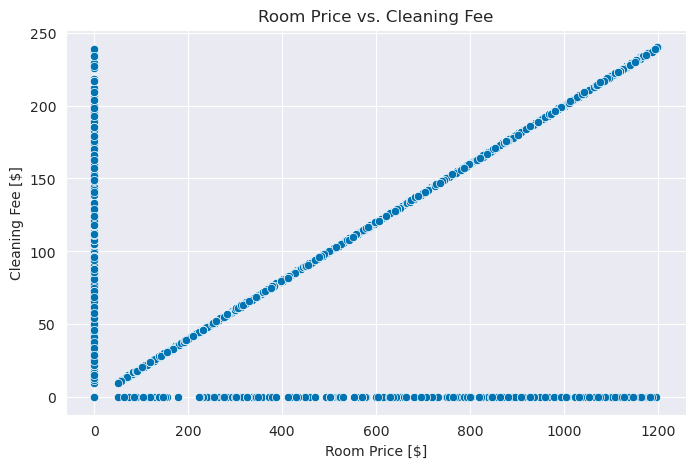

In [25]:
# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data = df, x='price', y='service_fee')
plt.xlabel('Room Price [$]')
plt.ylabel('Cleaning Fee [$]')
plt.title('Room Price vs. Cleaning Fee')
plt.show()

This plot looks quite confusing because of the imputed values, which are equal to 0. In order to make any asumption on the real relationship between the two columns, we have to ignore the imputed data. 

**Conclusion**: There is a linear correlation between the room price and the cleaning fee.

In [26]:
# The total amount of listings available per year
# First, we need to drop all the entries where construction year is 0 (the imputed values)
df_year = df.drop(df[df['construction_year'] == 0].index)
# Next, we should also convert the construction_year column to a datatime type
df_year['construction_year'] = pd.to_datetime(df_year['construction_year'], format='%Y')

Text(0.5, 1.0, 'Listing Construction Year vs. Price')

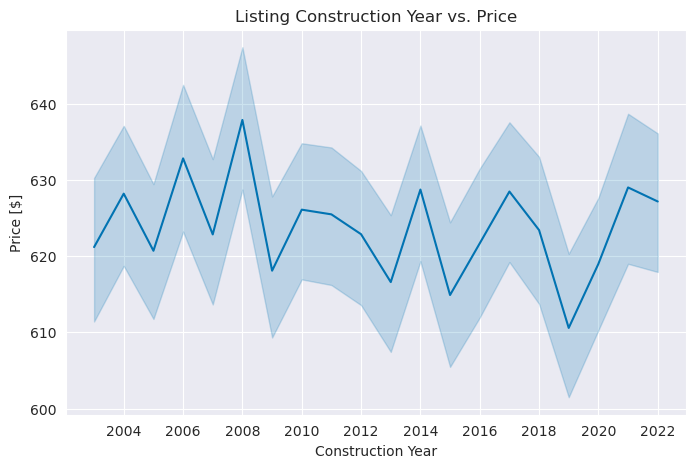

In [27]:
# plotting
plt.figure(figsize=(8,5))
sns.lineplot(x = "construction_year", y = "price", data = df_year)
plt.xlabel("Construction Year")
plt.ylabel("Price [$]")
plt.title("Listing Construction Year vs. Price")

## Task 5c: Data Visualization (Any Tool)

- Create a data visualization of your choosing using one of the review columns in isolation or in combination with another column.
- Create a visualization to compare at least two different variables between super hosts and regular hosts. ( we don't have the super host title anymore, hence this is no longer required)

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

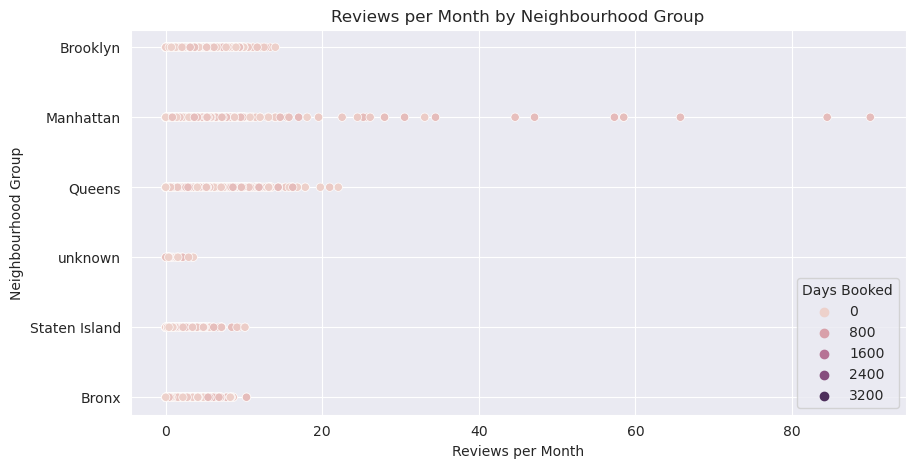

In [28]:
# Plotting the reviews per month grouped by the neightbourhood group
plt.figure(figsize=[10,5])
sns.scatterplot(x="reviews_per_month", y="neighbourhood_group", hue="days_booked", data=df)
plt.title("Reviews per Month by Neighbourhood Group")
plt.xlabel("Reviews per Month")
plt.ylabel("Neighbourhood Group")
plt.legend(title="Days Booked")
plt.show()

Seeing this means that we have a couple of outliners which look like unrealistic values, and which are messing up our analysis.

Checking all the numerical columns for outliners:

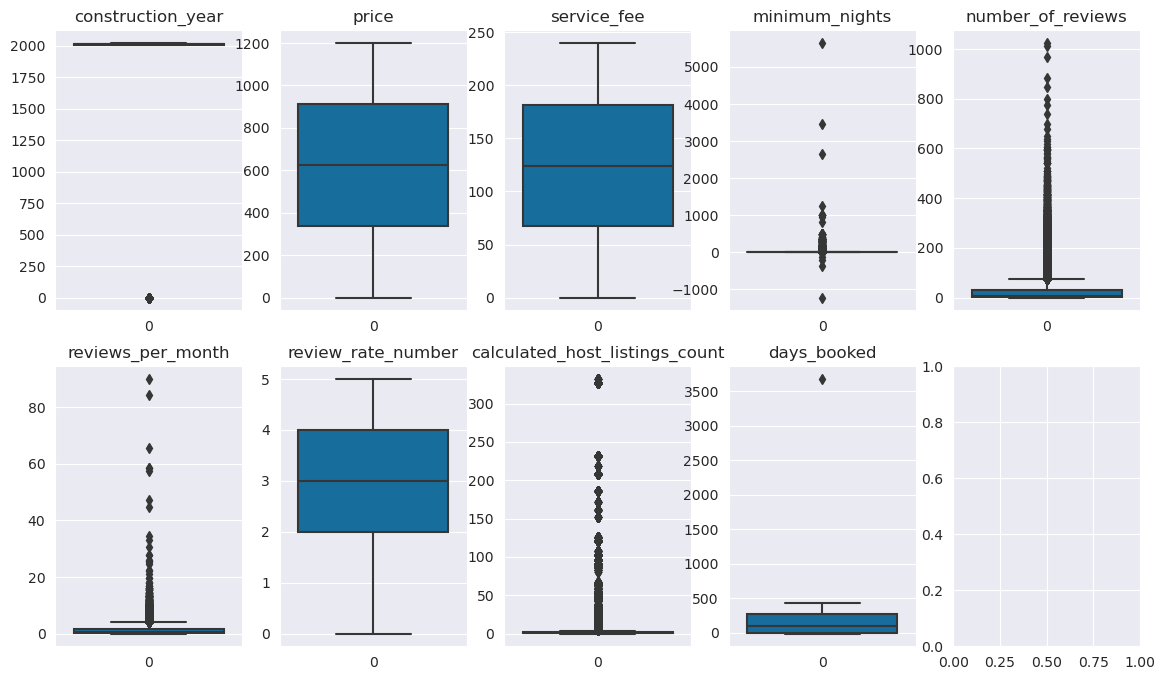

In [29]:
# Get just the numerical columns of the dataframe
numeric_columns = df.select_dtypes(include='number')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))

# Create a box plot for each column in the DataFrame
axes = axes.flatten()
for i, column in enumerate(numeric_columns.columns):
    sns.boxplot(data=numeric_columns[column], ax=axes[i])
    axes[i].set_title(column)

plt.show()

**Conclusion**: more data cleaning is required, specifically, getting rid of the outliners for columns *minimum_nights* and *days_booked* 

In [30]:
# Minimum_nights correction
# Finding the outliners
df['minimum_nights'].value_counts().sort_index(ascending=False).nsmallest(30)

5645.0    1
3455.0    1
2645.0    1
1250.0    1
954.0     1
825.0     1
458.0     1
399.0     1
398.0     1
371.0     1
350.0     1
340.0     1
333.0     1
323.0     1
307.0     1
273.0     1
268.0     1
250.0     1
222.0     1
198.0     1
189.0     1
184.0     1
175.0     1
166.0     1
155.0     1
153.0     1
149.0     1
144.0     1
142.0     1
134.0     1
Name: minimum_nights, dtype: int64

**Conclusion**: Even if the number of minimum nights is still high, we do not want to lose all the high values, hence 200 as a threshold seems like a decent value. We also need to get rid of the negative values, as they make no sense.

Text(0.5, 1.0, 'New distribution of minimum nights')

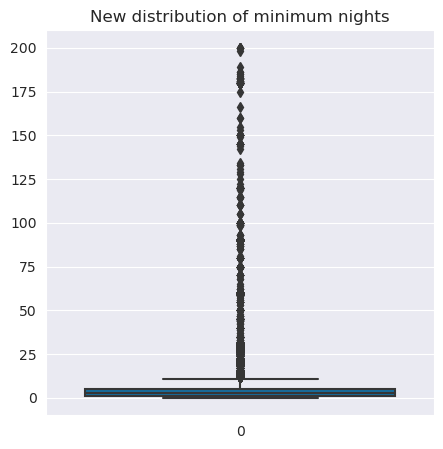

In [31]:
# Correcting the outliners
df.loc[df['minimum_nights'] < 0, 'minimum_nights'] = 0
threshold = 200
df.loc[df['minimum_nights'] > threshold, 'minimum_nights'] = df['minimum_nights'].median()

# Plotting the new distribution
plt.figure(figsize=[5,5])
sns.boxplot(data = df['minimum_nights'])
plt.title('New distribution of minimum nights')

In [32]:
# Days_booked
# Finding the outliners
df['days_booked'].value_counts().sort_index(ascending=False).nsmallest(10)

 3677.0     1
 401.0     30
 391.0     30
-6.0       31
 412.0     32
 375.0     32
 366.0     32
 417.0     33
 408.0     33
-7.0       35
Name: days_booked, dtype: int64

**Conclusion**: We can consider 402 as a good threshold this time. Also as before, we need to get rid of the negative values as well.

Text(0.5, 1.0, 'New distribution of days_booked')

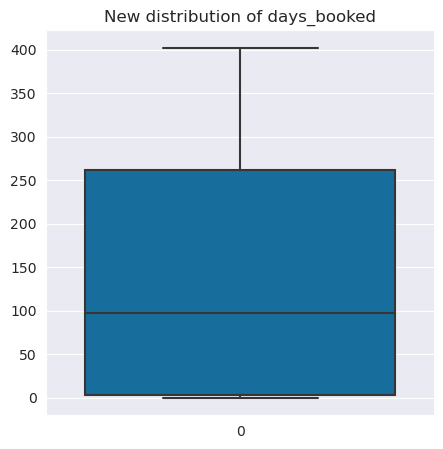

In [33]:
# Correcting the outliners
df.loc[df['days_booked'] < 0, 'days_booked'] = 0
threshold = 402
df.loc[df['days_booked'] > threshold, 'days_booked'] = df['days_booked'].median()

# Plotting the new distribution
plt.figure(figsize=[5,5])
sns.boxplot(data = df['days_booked'])
plt.title('New distribution of days_booked')

**Redoing the initial plot**

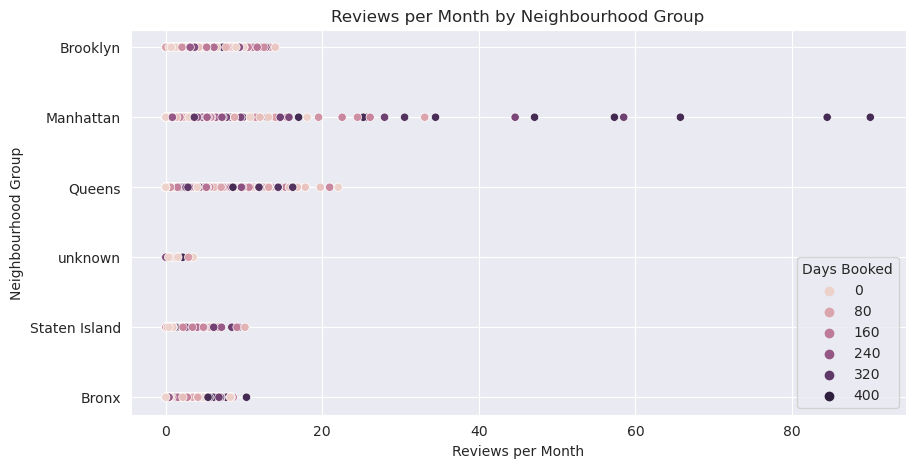

In [34]:
plt.figure(figsize=[10,5])
sns.scatterplot(x="reviews_per_month", y="neighbourhood_group", hue="days_booked", data=df)
plt.title("Reviews per Month by Neighbourhood Group")
plt.xlabel("Reviews per Month")
plt.ylabel("Neighbourhood Group")
plt.legend(title="Days Booked")
plt.show()